#**Installing the necessary extensions.**

In [ ]:
!pip install ngboost
!pip install scikit-learn-extra

#**Importing the necessary libraries.**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score, silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

#**Mounting and reading the data on standard variable 'data'.**

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/FoDS/dataset.csv'
data = pd.read_csv(file_path) # Loading the data into variable data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Performing PCA on the numeric attributes of data.**

In [ ]:
numeric_data = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
categorical_data = data.drop(columns=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
data_pca = pd.concat([categorical_data, pca_df], axis=1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of elements in data_original:", data.size)
print("Number of elements in data_pca:", data_pca.size)
print("Number of rows in data_original:", data.shape[0])
print("Number of rows in data_pca:", data_pca.shape[0])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

styled_data_df = data.head().reset_index(drop=True).style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

styled_data_pca_df = data_pca.head().reset_index(drop=True).style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

print("\nOriginal Data (data_original):")
display(styled_data_df)
time.sleep(2) # Required as without this, the second table prints before the first table can even print itself
print("\nPCA Transformed Data with Categorical Attributes (data_pca):")
display(styled_data_pca_df)


Explained Variance Ratio: [0.448133   0.2230434  0.16659928]
Number of elements in data_original: 22500
Number of elements in data_pca: 20000
Number of rows in data_original: 2500
Number of rows in data_pca: 2500

Original Data (data_original):


,gender_number,age,hypertension,heart_disease,smoking_number,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,72.000000,0,0,1,30.660000,4.500000,159,0
1,1,32.000000,0,0,1,39.970000,7.000000,280,1
2,1,46.000000,1,1,2,28.540000,5.700000,260,1
3,1,74.000000,0,0,0,27.320000,5.000000,160,0
4,1,32.000000,0,0,2,27.300000,5.700000,100,0



PCA Transformed Data with Categorical Attributes (data_pca):


,gender_number,hypertension,heart_disease,smoking_number,diabetes,PC1,PC2,PC3
0,0,0,0,1,0,0.254374,1.163105,-1.089557
1,1,0,0,1,1,2.141052,-0.838295,0.212601
2,1,1,1,2,1,0.972130,-0.851575,-1.165502
3,1,0,0,0,0,0.282040,0.681608,-1.090551
4,1,0,0,2,0,-1.002365,0.163576,0.657241


#**Performing regression on blood_glucose level across other numerical attributes.**

In [ ]:
X = data[['age', 'bmi', 'HbA1c_level']]
y = data['blood_glucose_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae

# Executing necessary regression functions and storing results

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, max_depth=10, n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(random_state=42, max_depth=10, n_estimators=100),
    "AdaBoost": AdaBoostRegressor(random_state=42, n_estimators=50),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42, max_depth=5, n_estimators=100),
    "NGBoost": NGBRegressor(random_state=42, n_estimators=100, verbose =False)
}

results = {}
for name, model in models.items():
    rmse, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"RMSE": rmse, "MAE": mae}

results_df = pd.DataFrame(results).T

styled_results_df = results_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

print("\nComparison of Regression Models:")
styled_results_df


Comparison of Regression Models:


,RMSE,MAE
Linear Regression,47.355947,36.558859
Random Forest,48.240764,37.331256
Extra Trees,48.083156,36.698548
AdaBoost,47.910267,38.676403
XGBoost,52.169931,40.474213
NGBoost,47.434920,35.557379


#**Testing the various classifier models accross diabetes being the column with the labels.**

In [ ]:
X = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Executing necessary classification functions and storing results

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(kernel='linear'),
    "Kernel SVM": SVC(kernel='rbf'),
    "Decision Trees": DecisionTreeClassifier(),
    "Neural Networks": MLPClassifier(max_iter=1000)
}

def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

results_original = {}
for name, model in classifiers.items():
    precision, recall, f1 = evaluate_classifier(model, X_train, X_test, y_train, y_test)
    results_original[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}

results_pca = {}
for name, model in classifiers.items():
    precision, recall, f1 = evaluate_classifier(model, X_train_pca, X_test_pca, y_train, y_test)
    results_pca[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}

results_original_df = pd.DataFrame(results_original).T
results_pca_df = pd.DataFrame(results_pca).T
comparison_df = pd.concat([results_original_df, results_pca_df], axis=1, keys=['Original Dataset', 'PCA Dataset'])

comparison_df.columns = pd.MultiIndex.from_tuples(
    [('Original Dataset', col) for col in results_original_df.columns] +
    [('          PCA Dataset', col) for col in results_pca_df.columns]
)

styled_comparison_df = comparison_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

print("\nComparison of Classifiers on Original and PCA Datasets:\n")
styled_comparison_df


Comparison of Classifiers on Original and PCA Datasets:



#**Testing the various clustering models (before and after z_score transformation).**



Clustering 3D plots with k=2



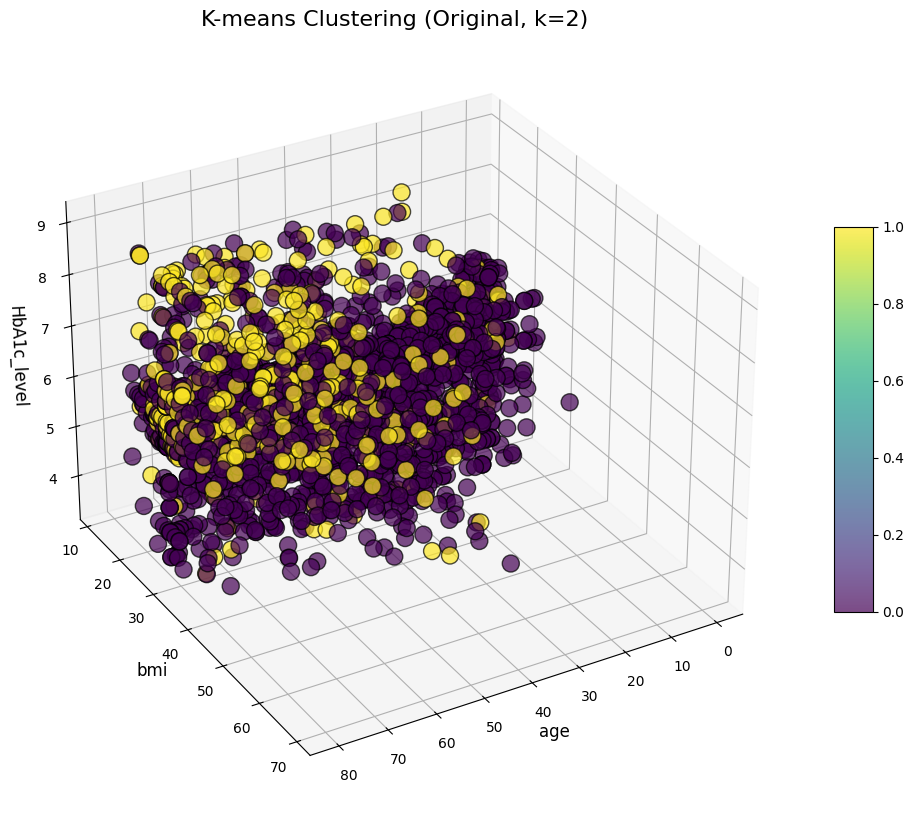

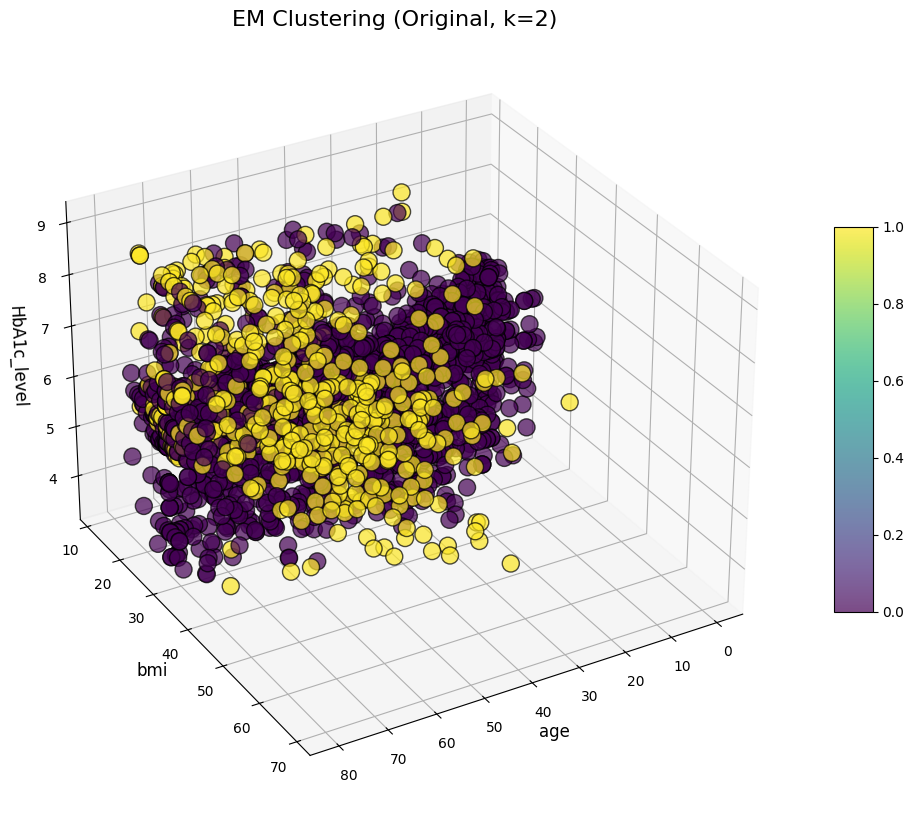

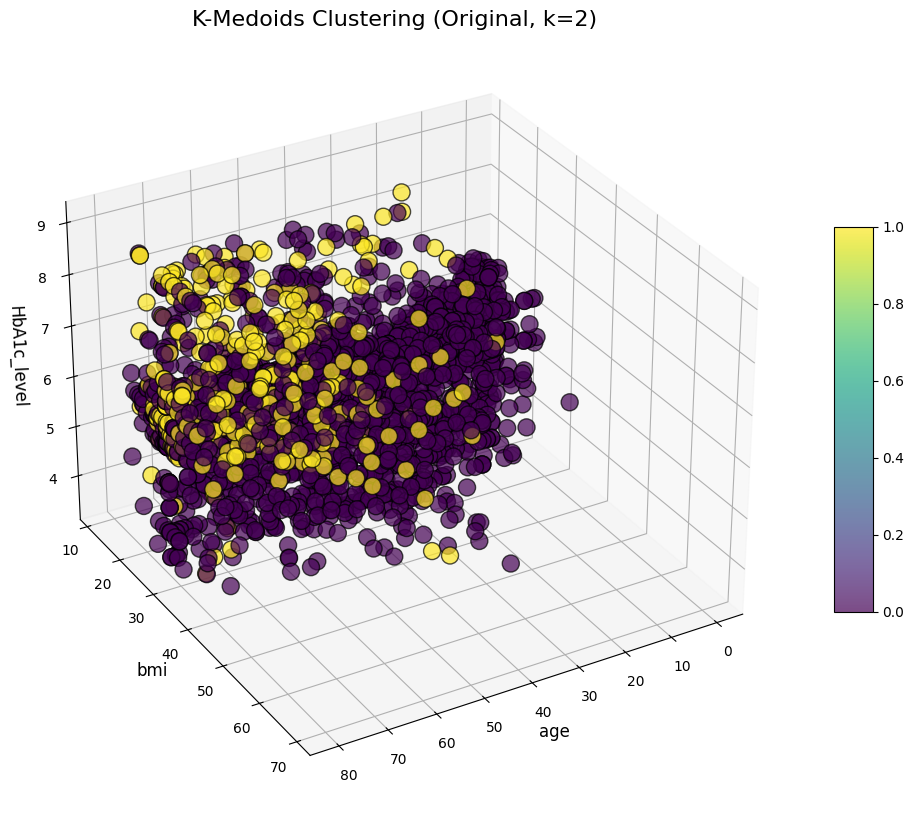

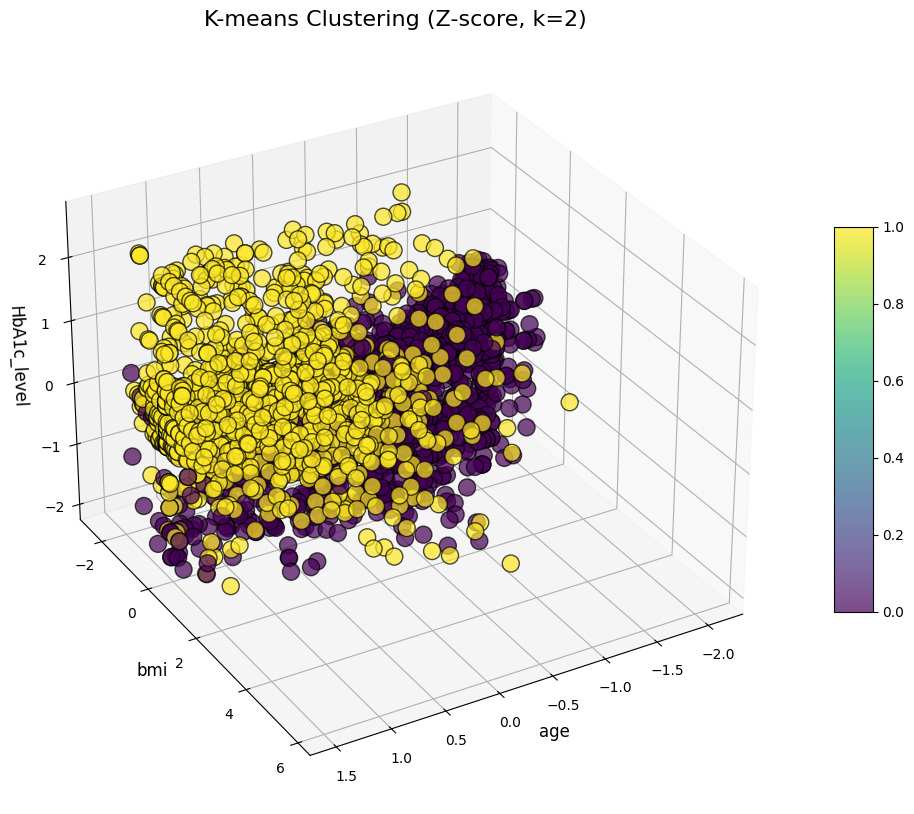

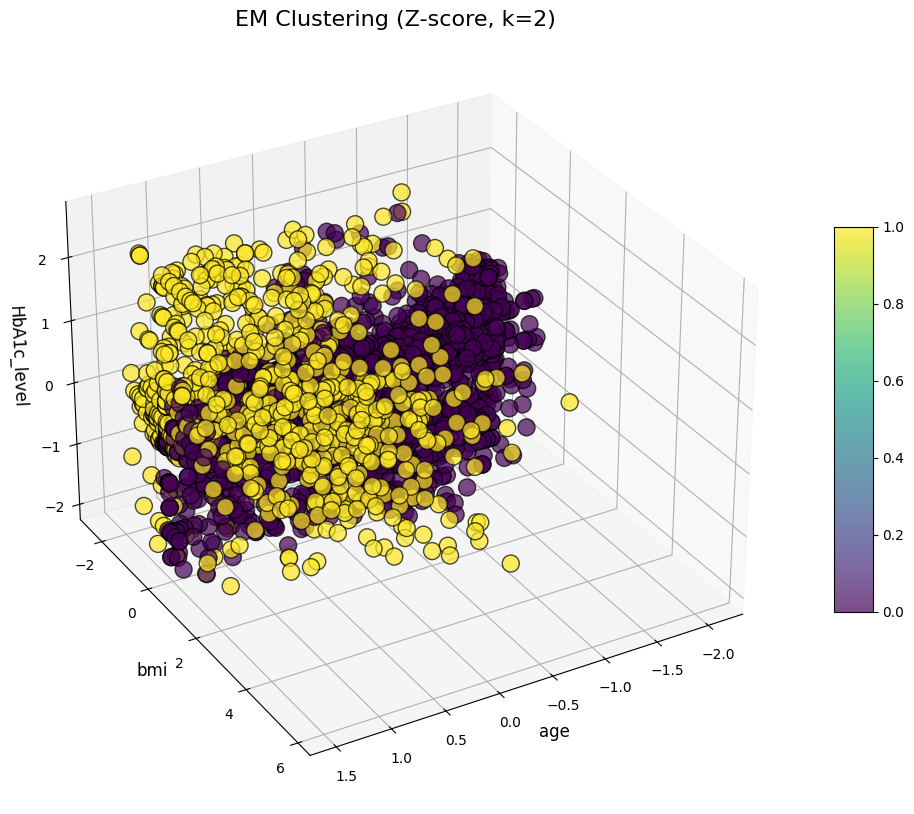

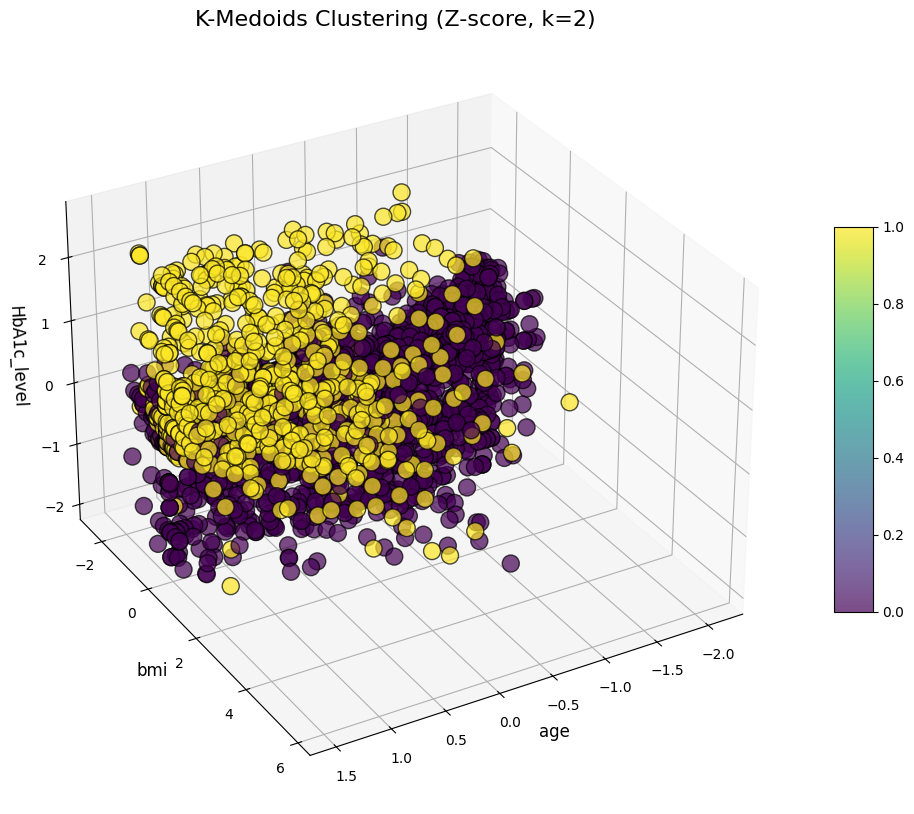


Clustering Evaluation Metrics:


,Clustering Method,Silhouette Score,Dunn's Index,BetaCV,Hubert Statistic,SSE
0,K-means (Original),0.563312,0.308604,2.283016,0.264006,3569228.444712
1,EM (Original),0.387285,0.001843,1.517056,0.366783,N/A
2,K-medoids (Original),0.570413,0.018577,2.493087,0.321107,N/A
3,K-means (Z-score),0.256037,0.014794,1.372868,0.368408,7096.868923
4,EM (Z-score),0.250315,0.009912,1.294957,0.394090,N/A
5,K-medoids (Z-score),0.277701,0.009980,1.381920,0.572792,N/A


In [ ]:
true_labels = data['diabetes']
X = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
k=2

scaler = StandardScaler()
X_zscore = scaler.fit_transform(X)

# Defining relevant functions to cluster and store results of each technique

def kmeans_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels, kmeans.inertia_

def em_clustering(X, k):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    return labels

def kmedoids_clustering(X, k):
    kmedoids = KMedoids(n_clusters=k, init='k-medoids++', random_state=42)
    kmedoids.fit(X)
    labels = kmedoids.labels_
    return labels

# Defining relevant functions to calculate necessary statistics

def dunn_index(X, labels):
    distances = pairwise_distances(X)
    intra_cluster_distances = []
    inter_cluster_distances = []
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        intra_cluster_distances.append(np.max(pairwise_distances(cluster_points)))
        for other_label in np.unique(labels):
            if label != other_label:
                other_cluster_points = X[labels == other_label]
                inter_cluster_distances.append(np.min(pairwise_distances(cluster_points, other_cluster_points)))
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

def beta_cv(X, labels):
    pairwise_dist = pairwise_distances(X)
    intra_cluster_distances = np.array([np.mean(pairwise_dist[labels == label, :][:, labels == label]) for label in np.unique(labels)])
    inter_cluster_distances = np.array([np.mean(pairwise_dist[labels == label, :][:, labels != label]) for label in np.unique(labels)])
    return np.mean(inter_cluster_distances) / np.mean(intra_cluster_distances)

def hubert_statistic(true_labels, cluster_labels):
    return adjusted_rand_score(true_labels, cluster_labels)

# Calling clustering functions and necessary statistics

labels_kmeans, sse_kmeans = kmeans_clustering(X, k)
labels_em = em_clustering(X, k)
labels_kmedoids = kmedoids_clustering(X, k)
labels_kmeans_zscore, sse_kmeans_zscore = kmeans_clustering(X_zscore, k)
labels_em_zscore = em_clustering(X_zscore, k)
labels_kmedoids_zscore = kmedoids_clustering(X_zscore, k)

dunn_kmeans = dunn_index(X, labels_kmeans)
beta_cv_kmeans = beta_cv(X, labels_kmeans)
hubert_kmeans = hubert_statistic(true_labels, labels_kmeans)
dunn_em = dunn_index(X, labels_em)
beta_cv_em = beta_cv(X, labels_em)
hubert_em = hubert_statistic(true_labels, labels_em)
dunn_kmedoids = dunn_index(X, labels_kmedoids)
beta_cv_kmedoids = beta_cv(X, labels_kmedoids)
hubert_kmedoids = hubert_statistic(true_labels, labels_kmedoids)

dunn_kmeans_zscore = dunn_index(X_zscore, labels_kmeans_zscore)
beta_cv_kmeans_zscore = beta_cv(X_zscore, labels_kmeans_zscore)
hubert_kmeans_zscore = hubert_statistic(true_labels, labels_kmeans_zscore)
dunn_em_zscore = dunn_index(X_zscore, labels_em_zscore)
beta_cv_em_zscore = beta_cv(X_zscore, labels_em_zscore)
hubert_em_zscore = hubert_statistic(true_labels, labels_em_zscore)
dunn_kmedoids_zscore = dunn_index(X_zscore, labels_kmedoids_zscore)
beta_cv_kmedoids_zscore = beta_cv(X_zscore, labels_kmedoids_zscore)
hubert_kmedoids_zscore = hubert_statistic(true_labels, labels_kmedoids_zscore)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Storing results in tabular format

results = {
    'Clustering Method': ['K-means (Original)', 'EM (Original)', 'K-medoids (Original)', 'K-means (Z-score)', 'EM (Z-score)', 'K-medoids (Z-score)'],
    'Silhouette Score': [silhouette_score(X, labels_kmeans), silhouette_score(X, labels_em), silhouette_score(X, labels_kmedoids),
                         silhouette_score(X_zscore, labels_kmeans_zscore), silhouette_score(X_zscore, labels_em_zscore), silhouette_score(X_zscore, labels_kmedoids_zscore)],
    'Dunn\'s Index': [dunn_kmeans, dunn_em, dunn_kmedoids, dunn_kmeans_zscore, dunn_em_zscore, dunn_kmedoids_zscore],
    'BetaCV': [beta_cv_kmeans, beta_cv_em, beta_cv_kmedoids, beta_cv_kmeans_zscore, beta_cv_em_zscore, beta_cv_kmedoids_zscore],
    'Hubert Statistic': [hubert_kmeans, hubert_em, hubert_kmedoids, hubert_kmeans_zscore, hubert_em_zscore, hubert_kmedoids_zscore],
    'SSE': [sse_kmeans, 'N/A', 'N/A', sse_kmeans_zscore, 'N/A', 'N/A']
}

results_df = pd.DataFrame(results)
X_values = X_zscore.values if isinstance(X_zscore, pd.DataFrame) else X_zscore
X_original_values = X.values if isinstance(X, pd.DataFrame) else X

def plot_clusters_3d(X, labels, title, feature_names):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    if isinstance(X, pd.DataFrame):
        X = X.values
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=150, alpha=0.7, edgecolors='k')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(feature_names[0], fontsize=12)
    ax.set_ylabel(feature_names[1], fontsize=12)
    ax.set_zlabel(feature_names[2], fontsize=12)
    ax.view_init(elev=30., azim=60)
    fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
    plt.show()

feature_names = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Creating and printing cluster visualizations

X_3d_values_original = X_original_values[:, :3]
X_3d_values_zscore = X_zscore[:, :3]

print("\nClustering 3D plots with k=2\n")

plot_clusters_3d(X_3d_values_original, labels_kmeans, f'K-means Clustering (Original, k=2)', feature_names)
plot_clusters_3d(X_3d_values_original, labels_em, f'EM Clustering (Original, k=2)', feature_names)
plot_clusters_3d(X_3d_values_original, labels_kmedoids, f'K-Medoids Clustering (Original, k=2)', feature_names)

plot_clusters_3d(X_3d_values_zscore, labels_kmeans_zscore, f'K-means Clustering (Z-score, k=2)', feature_names)
plot_clusters_3d(X_3d_values_zscore, labels_em_zscore, f'EM Clustering (Z-score, k=2)', feature_names)
plot_clusters_3d(X_3d_values_zscore, labels_kmedoids_zscore, f'K-Medoids Clustering (Z-score, k=2)', feature_names)


styled_results_df = results_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

print("\nClustering Evaluation Metrics:")
styled_results_df